#**Packages**

In [1]:
import pandas as pd
import numpy as np
import itertools

import datetime # to show the date and time
import timeit # to calculate the time consumption

import gzip

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from scipy.stats import bernoulli

import random

from scipy.stats import multivariate_normal
from scipy import linalg

import datetime # to show the date and time
import timeit # to calculate the time consumption

from collections import deque
import six
import json

import random
import math

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Jester

In [2]:
!pip install scikit-surprise
import surprise  # run 'pip install scikit-surprise' to install surprise

     |████████████████████████████████| 11.8 MB 3.1 MB/s eta 0:00:01    |██████████▌                     | 3.9 MB 3.1 MB/s eta 0:00:03
  ERROR: Command errored out with exit status 1:
   command: /Users/saeed/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/gd/wbg88f_17w59_1lv3v7gxg5m0000gp/T/pip-install-h6zwwymv/scikit-surprise_e7b069bf3e904812b67e2fe341ae8da8/setup.py'"'"'; __file__='"'"'/private/var/folders/gd/wbg88f_17w59_1lv3v7gxg5m0000gp/T/pip-install-h6zwwymv/scikit-surprise_e7b069bf3e904812b67e2fe341ae8da8/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/gd/wbg88f_17w59_1lv3v7gxg5m0000gp/T/pip-wheel-ge7_e4u5
       cwd: /private/var/folders/gd/wbg88f_17w59_1lv3v7gxg5m0000gp/T/pip-install-h6zwwymv/scikit-surprise_e7b069bf3e904812b67e2fe341ae8da8/
  Complete output (54

ModuleNotFoundError: No module named 'surprise'

In [3]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

ModuleNotFoundError: No module named 'surprise'

In [12]:
jokes = Dataset.load_builtin(name='jester')
trainset, testset = train_test_split(jokes, test_size=0.2)

#Only if you are running it the first time
svd = SVD(n_factors=150, n_epochs=10, lr_all=0.005, reg_all=0.4) #SVD(n_factors=100) 
svd.fit(trainset)

predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 4.2740
4.27395170000841


In [13]:
#If you are running it the first time - To save the results
np.save('drive/MyDrive/P2/Results/Jester/pu_all_1', svd.pu)
np.save('drive/MyDrive/P2/Results/Jester/qi_all_1', svd.qi)

#To load the results
pu_all = np.load('drive/MyDrive/P2/Results/Jester/pu_all_1.npy')
qi_all = np.load('drive/MyDrive/P2/Results/Jester/qi_all_1.npy')

In [14]:
#If you are running it the first time - To save the results
idx_item = []
for i in range(trainset.n_items):
    idx_item.append(trainset.to_raw_iid(i))

np.save('drive/MyDrive/P2/Results/Jester/idx_item_1', idx_item)


#to load the saved data
idx_item = np.load('drive/MyDrive/P2/Results/Jester/idx_item_1.npy')

print("#items in train set: " + str(len(idx_item)))

#items in train set: 140


In [15]:
idx_item_int = [int(item) for item in idx_item]
actions = idx_item_int

In [16]:
#If you are running it the first time - To save the results
idx_user = []
for i in range(trainset.n_users):
    idx_user.append(trainset.to_raw_uid(i))

np.save('drive/MyDrive/P2/Results/Jester/idx_user_1', idx_user)


#to load the saved data
idx_user = np.load('drive/MyDrive/P2/Results/Jester/idx_user_1.npy')

print("#users in train set: " + str(len(idx_user)))

#users in train set: 58781


In [17]:
idx_user_int = [int(item) for item in idx_user]

In [18]:
action_features = pd.DataFrame(data=qi_all)
action_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,-0.042420,0.026328,0.159753,0.187304,-0.087448,0.408996,0.155000,0.360512,0.011722,0.346329,-0.002564,-0.159551,0.018904,0.138948,-0.170443,0.013071,-0.055199,-0.110034,0.223122,0.004826,-0.090924,0.014263,0.023242,-0.070514,-0.108123,0.064607,0.375800,-0.024864,-0.022954,-0.143602,0.141572,0.094435,0.282085,-0.256532,-0.011183,0.237383,0.320127,-0.223113,0.172362,0.088572,...,-0.503512,-0.141936,-0.156011,0.249293,0.091771,-0.204934,0.529832,-0.096395,-0.023534,-0.199110,-0.092910,-0.167562,-0.048004,0.118701,0.128810,0.100444,-0.403066,0.041157,-0.126126,0.117456,-0.026817,0.018820,-0.005441,-0.031714,-0.094167,-0.286734,0.186445,0.579883,0.255223,-0.262384,0.032466,0.218899,-0.075428,0.170993,0.392254,0.381456,0.067058,0.045402,-0.155925,-0.026445
1,-0.285427,-0.113514,-0.009005,0.022295,0.493338,0.413233,-0.446296,0.098568,0.059830,-0.348984,-0.075342,-0.262589,-0.316599,-0.147730,0.319623,0.419638,-0.134719,-0.106031,0.081846,-0.076041,0.355839,0.790288,-0.679639,0.766302,0.310927,0.319494,0.349976,-0.281172,0.479320,-0.564435,-0.070260,0.292395,-0.455267,-0.494067,-0.057858,-0.043641,0.046092,-0.264576,0.406584,-0.409830,...,0.285750,-0.053963,0.403274,0.392789,-0.198557,0.105373,-0.015177,0.212613,0.026258,-0.322848,-0.122891,-0.398086,-0.017365,0.032726,0.409960,-0.003233,-0.452504,-0.371235,0.090824,0.191697,0.070392,0.857049,0.536828,0.386405,0.324033,-0.090722,0.194613,1.135981,-0.102640,-0.177411,0.271833,0.598906,0.047630,0.253761,0.017929,-0.072279,0.191851,-0.226238,-0.124372,-0.703112
2,-0.072829,-0.010325,0.091070,0.172508,0.035079,-0.186497,-0.147122,-0.005816,-0.114005,0.123242,0.001182,0.070989,0.191246,0.048229,-0.005238,-0.007756,-0.090357,-0.064016,-0.080835,-0.187670,-0.107119,-0.125650,0.029791,0.357410,0.033822,0.100794,0.295724,-0.215749,-0.056977,0.006305,0.241854,0.066277,0.175143,-0.221870,-0.185949,0.166058,0.273172,-0.268298,0.181869,-0.281934,...,-0.473986,0.044138,0.022565,0.206737,0.219548,-0.268606,0.301831,-0.223940,0.093607,0.073607,0.187802,0.009177,-0.079753,0.007506,-0.016085,-0.171457,-0.313700,0.065700,-0.240083,0.013048,-0.097335,-0.082166,-0.060287,0.052358,-0.090308,-0.334074,0.221994,0.407062,0.039028,0.112486,0.086235,0.039623,-0.173101,-0.022649,0.434294,0.268855,0.375822,-0.040054,-0.082833,-0.041466
3,0.137586,0.596569,0.418151,-0.489345,0.300933,0.413868,0.021680,0.169561,-0.077790,0.768899,-0.034778,-0.025084,-0.683692,-0.054267,0.267075,0.171428,-0.068780,0.074664,0.051285,-0.429582,0.128510,0.821766,-0.377808,0.537974,0.232472,0.221768,0.059513,-0.101047,0.612151,0.061362,0.109560,-0.169988,-0.080716,-0.031829,0.065610,0.189462,-0.250460,-0.019904,0.540136,-0.442063,...,-0.323403,0.133469,-0.042519,-0.102934,-0.277750,0.001784,-0.036049,-0.397962,-0.368770,0.096111,-0.232921,-0.140151,0.186751,0.336461,0.084760,-0.218335,0.070760,-0.015488,-0.081956,0.225772,-0.309179,0.123453,0.662421,0.169386,-0.292752,-0.304927,-0.112995,0.342060,-0.077587,-0.305628,0.160657,0.697770,0.182298,0.490351,0.129443,0.028340,0.032577,-0.281377,-0.479361,0.118715
4,0.162574,-0.093956,0.118233,-0.623118,0.276523,0.277628,-0.231033,0.222397,-0.456614,-0.277984,0.349130,-0.333240,-0.360837,0.179704,0.534465,0.535049,-0.167206,0.033183,0.060323,-0.153570,0.613833,0.857697,-0.203790,0.354926,0.491427,0.098833,0.434895,-0.344384,0.604264,-0.176788,0.625616,0.357020,-0.063709,0.022208,0.134217,0.263840,-0.212555,-0.318564,0.630834,-0.538264,...,0.291249,0.327430,0.130624,0.262185,0.280209,0.051772,-0.000152,0.074072,-0.290401,-0.381750,0.219402,-0.353672,-0.295885,0.489758,0.474436,-0.076293,0.072819,-0.044424,0.075128,0.282603,-0.401929,0.223948,0.555491,-0.119215,-0.068544,-0.344698,-0.174944,0.709117,0.000545,-0.288505,0.1038

In [19]:
action_features.insert(0, 'jokeid', idx_item_int) #action_features["MovieID"] = idx
action_features.head()

,jokeid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,147,-0.042420,0.026328,0.159753,0.187304,-0.087448,0.408996,0.155000,0.360512,0.011722,0.346329,-0.002564,-0.159551,0.018904,0.138948,-0.170443,0.013071,-0.055199,-0.110034,0.223122,0.004826,-0.090924,0.014263,0.023242,-0.070514,-0.108123,0.064607,0.375800,-0.024864,-0.022954,-0.143602,0.141572,0.094435,0.282085,-0.256532,-0.011183,0.237383,0.320127,-0.223113,0.172362,...,-0.503512,-0.141936,-0.156011,0.249293,0.091771,-0.204934,0.529832,-0.096395,-0.023534,-0.199110,-0.092910,-0.167562,-0.048004,0.118701,0.128810,0.100444,-0.403066,0.041157,-0.126126,0.117456,-0.026817,0.018820,-0.005441,-0.031714,-0.094167,-0.286734,0.186445,0.579883,0.255223,-0.262384,0.032466,0.218899,-0.075428,0.170993,0.392254,0.381456,0.067058,0.045402,-0.155925,-0.026445
1,7,-0.285427,-0.113514,-0.009005,0.022295,0.493338,0.413233,-0.446296,0.098568,0.059830,-0.348984,-0.075342,-0.262589,-0.316599,-0.147730,0.319623,0.419638,-0.134719,-0.106031,0.081846,-0.076041,0.355839,0.790288,-0.679639,0.766302,0.310927,0.319494,0.349976,-0.281172,0.479320,-0.564435,-0.070260,0.292395,-0.455267,-0.494067,-0.057858,-0.043641,0.046092,-0.264576,0.406584,...,0.285750,-0.053963,0.403274,0.392789,-0.198557,0.105373,-0.015177,0.212613,0.026258,-0.322848,-0.122891,-0.398086,-0.017365,0.032726,0.409960,-0.003233,-0.452504,-0.371235,0.090824,0.191697,0.070392,0.857049,0.536828,0.386405,0.324033,-0.090722,0.194613,1.135981,-0.102640,-0.177411,0.271833,0.598906,0.047630,0.253761,0.017929,-0.072279,0.191851,-0.226238,-0.124372,-0.703112
2,67,-0.072829,-0.010325,0.091070,0.172508,0.035079,-0.186497,-0.147122,-0.005816,-0.114005,0.123242,0.001182,0.070989,0.191246,0.048229,-0.005238,-0.007756,-0.090357,-0.064016,-0.080835,-0.187670,-0.107119,-0.125650,0.029791,0.357410,0.033822,0.100794,0.295724,-0.215749,-0.056977,0.006305,0.241854,0.066277,0.175143,-0.221870,-0.185949,0.166058,0.273172,-0.268298,0.181869,...,-0.473986,0.044138,0.022565,0.206737,0.219548,-0.268606,0.301831,-0.223940,0.093607,0.073607,0.187802,0.009177,-0.079753,0.007506,-0.016085,-0.171457,-0.313700,0.065700,-0.240083,0.013048,-0.097335,-0.082166,-0.060287,0.052358,-0.090308,-0.334074,0.221994,0.407062,0.039028,0.112486,0.086235,0.039623,-0.173101,-0.022649,0.434294,0.268855,0.375822,-0.040054,-0.082833,-0.041466
3,13,0.137586,0.596569,0.418151,-0.489345,0.300933,0.413868,0.021680,0.169561,-0.077790,0.768899,-0.034778,-0.025084,-0.683692,-0.054267,0.267075,0.171428,-0.068780,0.074664,0.051285,-0.429582,0.128510,0.821766,-0.377808,0.537974,0.232472,0.221768,0.059513,-0.101047,0.612151,0.061362,0.109560,-0.169988,-0.080716,-0.031829,0.065610,0.189462,-0.250460,-0.019904,0.540136,...,-0.323403,0.133469,-0.042519,-0.102934,-0.277750,0.001784,-0.036049,-0.397962,-0.368770,0.096111,-0.232921,-0.140151,0.186751,0.336461,0.084760,-0.218335,0.070760,-0.015488,-0.081956,0.225772,-0.309179,0.123453,0.662421,0.169386,-0.292752,-0.304927,-0.112995,0.342060,-0.077587,-0.305628,0.160657,0.697770,0.182298,0.490351,0.129443,0.028340,0.032577,-0.281377,-0.479361,0.118715
4,8,0.162574,-0.093956,0.118233,-0.623118,0.276523,0.277628,-0.231033,0.222397,-0.456614,-0.277984,0.349130,-0.333240,-0.360837,0.179704,0.534465,0.535049,-0.167206,0.033183,0.060323,-0.153570,0.613833,0.857697,-0.203790,0.354926,0.491427,0.098833,0.434895,-0.344384,0.604264,-0.176788,0.625616,0.357020,-0.063709,0.022208,0.134217,0.263840,-0.212555,-0.318564,0.630834,...,0.291249,0.327430,0.130624,0.262185,0.280209,0.051772,-0.000152,0.074072,-0.290401,-0.381750,0.219402,-0.353672,-0.295885,0.489758,0.474436,-0.076293,0.072819,-0.044424,0.075128,0.282603,-0.401929,0.223948,0.555491,-0.119215,-0.068544,-0.344698,-0.174944,0.709117,0.000545,-0.288505,0.103855,0.555999,-0.492901,0.579317,

In [20]:
#If you are running it the first time - To save the results
action_features.to_csv('drive/MyDrive/P2/Results/Jester/action_features_1.csv', index=False)

#to load the saved data
action_features = pd.read_csv('drive/MyDrive/P2/Results/Jester/action_features_1.csv')

action_features.head()

,jokeid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,147,-0.042420,0.026328,0.159753,0.187304,-0.087448,0.408996,0.155000,0.360512,0.011722,0.346329,-0.002564,-0.159551,0.018904,0.138948,-0.170443,0.013071,-0.055199,-0.110034,0.223122,0.004826,-0.090924,0.014263,0.023242,-0.070514,-0.108123,0.064607,0.375800,-0.024864,-0.022954,-0.143602,0.141572,0.094435,0.282085,-0.256532,-0.011183,0.237383,0.320127,-0.223113,0.172362,...,-0.503512,-0.141936,-0.156011,0.249293,0.091771,-0.204934,0.529832,-0.096395,-0.023534,-0.199110,-0.092910,-0.167562,-0.048004,0.118701,0.128810,0.100444,-0.403066,0.041157,-0.126126,0.117456,-0.026817,0.018820,-0.005441,-0.031714,-0.094167,-0.286734,0.186445,0.579883,0.255223,-0.262384,0.032466,0.218899,-0.075428,0.170993,0.392254,0.381456,0.067058,0.045402,-0.155925,-0.026445
1,7,-0.285427,-0.113514,-0.009005,0.022295,0.493338,0.413233,-0.446296,0.098568,0.059830,-0.348984,-0.075342,-0.262589,-0.316599,-0.147730,0.319623,0.419638,-0.134719,-0.106031,0.081846,-0.076041,0.355839,0.790288,-0.679639,0.766302,0.310927,0.319494,0.349976,-0.281172,0.479320,-0.564435,-0.070260,0.292395,-0.455267,-0.494067,-0.057858,-0.043641,0.046092,-0.264576,0.406584,...,0.285750,-0.053963,0.403274,0.392789,-0.198557,0.105373,-0.015177,0.212613,0.026258,-0.322848,-0.122891,-0.398086,-0.017365,0.032726,0.409960,-0.003233,-0.452504,-0.371235,0.090824,0.191697,0.070392,0.857049,0.536828,0.386405,0.324033,-0.090722,0.194613,1.135981,-0.102640,-0.177411,0.271833,0.598906,0.047630,0.253761,0.017929,-0.072279,0.191851,-0.226238,-0.124372,-0.703112
2,67,-0.072829,-0.010325,0.091070,0.172508,0.035079,-0.186497,-0.147122,-0.005816,-0.114005,0.123242,0.001182,0.070989,0.191246,0.048229,-0.005238,-0.007756,-0.090357,-0.064016,-0.080835,-0.187670,-0.107119,-0.125650,0.029791,0.357410,0.033822,0.100794,0.295724,-0.215749,-0.056977,0.006305,0.241854,0.066277,0.175143,-0.221870,-0.185949,0.166058,0.273172,-0.268298,0.181869,...,-0.473986,0.044138,0.022565,0.206737,0.219548,-0.268606,0.301831,-0.223940,0.093607,0.073607,0.187802,0.009177,-0.079753,0.007506,-0.016085,-0.171457,-0.313700,0.065700,-0.240083,0.013048,-0.097335,-0.082166,-0.060287,0.052358,-0.090308,-0.334074,0.221994,0.407062,0.039028,0.112486,0.086235,0.039623,-0.173101,-0.022649,0.434294,0.268855,0.375822,-0.040054,-0.082833,-0.041466
3,13,0.137586,0.596569,0.418151,-0.489345,0.300933,0.413868,0.021680,0.169561,-0.077790,0.768899,-0.034778,-0.025084,-0.683692,-0.054267,0.267075,0.171428,-0.068780,0.074664,0.051285,-0.429582,0.128510,0.821766,-0.377808,0.537974,0.232472,0.221768,0.059513,-0.101047,0.612151,0.061362,0.109560,-0.169988,-0.080716,-0.031829,0.065610,0.189462,-0.250460,-0.019904,0.540136,...,-0.323403,0.133469,-0.042519,-0.102934,-0.277750,0.001784,-0.036049,-0.397962,-0.368770,0.096111,-0.232921,-0.140151,0.186751,0.336461,0.084760,-0.218335,0.070760,-0.015488,-0.081956,0.225772,-0.309179,0.123453,0.662421,0.169386,-0.292752,-0.304927,-0.112995,0.342060,-0.077587,-0.305628,0.160657,0.697770,0.182298,0.490351,0.129443,0.028340,0.032577,-0.281377,-0.479361,0.118715
4,8,0.162574,-0.093956,0.118233,-0.623118,0.276523,0.277628,-0.231033,0.222397,-0.456614,-0.277984,0.349130,-0.333240,-0.360837,0.179704,0.534465,0.535049,-0.167206,0.033183,0.060323,-0.153570,0.613833,0.857697,-0.203790,0.354926,0.491427,0.098833,0.434895,-0.344384,0.604264,-0.176788,0.625616,0.357020,-0.063709,0.022208,0.134217,0.263840,-0.212555,-0.318564,0.630834,...,0.291249,0.327430,0.130624,0.262185,0.280209,0.051772,-0.000152,0.074072,-0.290401,-0.381750,0.219402,-0.353672,-0.295885,0.489758,0.474436,-0.076293,0.072819,-0.044424,0.075128,0.282603,-0.401929,0.223948,0.555491,-0.119215,-0.068544,-0.344698,-0.174944,0.709117,0.000545,-0.288505,0.103855,0.555999,-0.492901,0.579317,

In [21]:
user_features = pd.DataFrame(data=pu_all)
user_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,0.036251,0.127386,0.072640,0.207218,-0.197850,0.192510,0.250520,0.203345,0.140496,0.333266,-0.005356,0.021709,0.108155,0.019575,-0.133096,-0.198614,-0.021943,0.003887,0.093907,0.116303,-0.284366,-0.293361,0.123707,-0.090129,-0.228140,0.099665,0.129242,0.103109,-0.159374,0.004954,0.039750,0.194820,0.183437,-0.172413,-0.115869,0.038837,0.180422,-0.066575,-0.144225,0.147867,...,-0.683380,-0.037499,-0.151781,0.049557,0.088675,-0.202299,0.400527,-0.247821,-0.047256,-0.053073,-0.048360,0.063057,-0.058934,0.099158,-0.152052,-0.049162,-0.202002,0.172282,-0.036970,0.006620,0.053369,-0.175855,-0.174765,-0.063596,-0.025922,-0.174674,0.227774,0.025752,0.094497,0.019053,0.059866,0.032948,-0.125153,0.019654,0.284776,0.458767,0.121637,0.080647,0.111015,0.100521
1,0.017581,0.041340,0.016297,0.202807,0.023016,-0.057300,-0.037251,0.029894,0.005906,-0.037561,-0.056607,-0.015319,0.106020,0.085934,-0.010339,0.066560,-0.132321,0.105078,0.037788,0.006730,0.047997,0.078454,-0.216965,-0.003086,0.045191,0.102197,0.064120,0.141605,-0.096585,0.096772,0.036333,0.036610,-0.030301,-0.106068,-0.148879,-0.046527,0.164859,-0.140277,-0.066040,0.145718,...,-0.005109,0.006419,0.005070,0.049625,0.091815,-0.044918,-0.081253,0.025951,-0.006886,-0.033868,-0.061696,-0.060854,0.081156,-0.064174,-0.046026,-0.124820,-0.116561,-0.112835,-0.068674,0.015409,0.102103,-0.055831,0.028990,0.162930,-0.048024,0.056648,0.281199,0.239934,0.041424,0.046266,0.064330,0.048003,-0.042745,-0.124957,0.031068,0.062935,0.194954,-0.134059,-0.087564,-0.125741
2,-0.023234,-0.034780,0.229900,0.050600,0.017913,0.460422,0.165374,0.220525,-0.032542,0.219209,0.094601,-0.215145,-0.089830,0.109170,-0.082387,-0.025105,-0.005599,-0.069123,0.282281,0.092582,-0.059340,0.104514,0.042234,-0.309907,-0.046265,0.023927,0.011828,0.064474,0.224233,-0.159986,-0.001038,0.025487,0.128798,-0.180285,0.109802,0.046089,0.035084,0.093207,-0.082820,0.282487,...,-0.147202,-0.109674,-0.109974,0.082124,-0.129528,-0.002972,0.233019,-0.037866,-0.089160,-0.218065,-0.235677,-0.147759,0.145073,0.094975,0.158327,0.117269,-0.137248,0.004980,0.123455,0.209902,0.219729,0.116168,0.100424,0.018079,-0.107258,-0.032774,0.125791,0.211096,0.094179,-0.373634,0.009514,0.215757,-0.025817,0.229716,-0.045191,0.076262,-0.002323,0.212775,-0.020339,0.025215
3,-0.011122,0.021794,0.224233,0.014011,0.034279,-0.057028,0.024398,-0.158502,-0.005770,0.066823,-0.016079,-0.006211,-0.066537,-0.032760,-0.051884,-0.027737,-0.003335,0.090286,-0.086080,-0.156301,0.186403,0.188429,0.053681,0.028694,-0.069468,-0.015526,-0.215870,-0.081765,0.150894,-0.114253,-0.056284,0.084450,-0.096606,0.006310,0.021998,0.036397,-0.019385,-0.044933,0.088244,-0.080546,...,0.028652,-0.044541,-0.064077,-0.034730,0.146865,-0.101055,-0.084088,-0.014850,0.044139,0.044202,0.095029,0.097281,0.023810,0.037588,-0.003216,-0.168326,-0.019552,0.026676,0.001497,-0.004805,-0.101144,-0.055909,-0.033714,-0.014099,-0.033804,-0.030929,-0.120610,-0.076628,0.169888,0.039192,0.200177,-0.019638,-0.050598,0.114238,-0.024391,-0.020895,0.021787,0.065551,-0.092353,0.060946
4,-0.061021,-0.051984,0.016824,-0.033790,-0.041614,-0.076603,0.149242,-0.145283,0.005211,0.251693,-0.017241,0.068540,0.017433,0.013388,0.116316,-0.043678,0.016773,-0.039330,-0.098671,-0.046941,0.077213,-0.040419,-0.115333,-0.253349,-0.159417,-0.063485,-0.082034,0.020069,0.031618,0.136279,0.101571,-0.140305,-0.071898,0.081235,-0.016604,0.049202,0.037364,0.034394,-0.033816,-0.002528,...,-0.061172,-0.006466,-0.116187,-0.037306,-0.034457,0.101065,0.052170,0.066674,0.028413,0.181808,0.053792,0.074738,0.022373,0.106617,0.026493,-0.099941,0.019922,-0.093867,-0.193719,-0.021087,-0.031265,-0.025846,-0.106146,-0.179354,-0.076244,-0.209031,-0.039324,-0.157663,-0.101136,0.097

In [22]:
user_features.insert(0, 'userid', idx_user_int)
user_features.head()

,userid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,44475,0.036251,0.127386,0.072640,0.207218,-0.197850,0.192510,0.250520,0.203345,0.140496,0.333266,-0.005356,0.021709,0.108155,0.019575,-0.133096,-0.198614,-0.021943,0.003887,0.093907,0.116303,-0.284366,-0.293361,0.123707,-0.090129,-0.228140,0.099665,0.129242,0.103109,-0.159374,0.004954,0.039750,0.194820,0.183437,-0.172413,-0.115869,0.038837,0.180422,-0.066575,-0.144225,...,-0.683380,-0.037499,-0.151781,0.049557,0.088675,-0.202299,0.400527,-0.247821,-0.047256,-0.053073,-0.048360,0.063057,-0.058934,0.099158,-0.152052,-0.049162,-0.202002,0.172282,-0.036970,0.006620,0.053369,-0.175855,-0.174765,-0.063596,-0.025922,-0.174674,0.227774,0.025752,0.094497,0.019053,0.059866,0.032948,-0.125153,0.019654,0.284776,0.458767,0.121637,0.080647,0.111015,0.100521
1,35360,0.017581,0.041340,0.016297,0.202807,0.023016,-0.057300,-0.037251,0.029894,0.005906,-0.037561,-0.056607,-0.015319,0.106020,0.085934,-0.010339,0.066560,-0.132321,0.105078,0.037788,0.006730,0.047997,0.078454,-0.216965,-0.003086,0.045191,0.102197,0.064120,0.141605,-0.096585,0.096772,0.036333,0.036610,-0.030301,-0.106068,-0.148879,-0.046527,0.164859,-0.140277,-0.066040,...,-0.005109,0.006419,0.005070,0.049625,0.091815,-0.044918,-0.081253,0.025951,-0.006886,-0.033868,-0.061696,-0.060854,0.081156,-0.064174,-0.046026,-0.124820,-0.116561,-0.112835,-0.068674,0.015409,0.102103,-0.055831,0.028990,0.162930,-0.048024,0.056648,0.281199,0.239934,0.041424,0.046266,0.064330,0.048003,-0.042745,-0.124957,0.031068,0.062935,0.194954,-0.134059,-0.087564,-0.125741
2,59569,-0.023234,-0.034780,0.229900,0.050600,0.017913,0.460422,0.165374,0.220525,-0.032542,0.219209,0.094601,-0.215145,-0.089830,0.109170,-0.082387,-0.025105,-0.005599,-0.069123,0.282281,0.092582,-0.059340,0.104514,0.042234,-0.309907,-0.046265,0.023927,0.011828,0.064474,0.224233,-0.159986,-0.001038,0.025487,0.128798,-0.180285,0.109802,0.046089,0.035084,0.093207,-0.082820,...,-0.147202,-0.109674,-0.109974,0.082124,-0.129528,-0.002972,0.233019,-0.037866,-0.089160,-0.218065,-0.235677,-0.147759,0.145073,0.094975,0.158327,0.117269,-0.137248,0.004980,0.123455,0.209902,0.219729,0.116168,0.100424,0.018079,-0.107258,-0.032774,0.125791,0.211096,0.094179,-0.373634,0.009514,0.215757,-0.025817,0.229716,-0.045191,0.076262,-0.002323,0.212775,-0.020339,0.025215
3,24757,-0.011122,0.021794,0.224233,0.014011,0.034279,-0.057028,0.024398,-0.158502,-0.005770,0.066823,-0.016079,-0.006211,-0.066537,-0.032760,-0.051884,-0.027737,-0.003335,0.090286,-0.086080,-0.156301,0.186403,0.188429,0.053681,0.028694,-0.069468,-0.015526,-0.215870,-0.081765,0.150894,-0.114253,-0.056284,0.084450,-0.096606,0.006310,0.021998,0.036397,-0.019385,-0.044933,0.088244,...,0.028652,-0.044541,-0.064077,-0.034730,0.146865,-0.101055,-0.084088,-0.014850,0.044139,0.044202,0.095029,0.097281,0.023810,0.037588,-0.003216,-0.168326,-0.019552,0.026676,0.001497,-0.004805,-0.101144,-0.055909,-0.033714,-0.014099,-0.033804,-0.030929,-0.120610,-0.076628,0.169888,0.039192,0.200177,-0.019638,-0.050598,0.114238,-0.024391,-0.020895,0.021787,0.065551,-0.092353,0.060946
4,7320,-0.061021,-0.051984,0.016824,-0.033790,-0.041614,-0.076603,0.149242,-0.145283,0.005211,0.251693,-0.017241,0.068540,0.017433,0.013388,0.116316,-0.043678,0.016773,-0.039330,-0.098671,-0.046941,0.077213,-0.040419,-0.115333,-0.253349,-0.159417,-0.063485,-0.082034,0.020069,0.031618,0.136279,0.101571,-0.140305,-0.071898,0.081235,-0.016604,0.049202,0.037364,0.034394,-0.033816,...,-0.061172,-0.006466,-0.116187,-0.037306,-0.034457,0.101065,0.052170,0.066674,0.028413,0.181808,0.053792,0.074738,0.022373,0.106617,0.026493,-0.099941,0.019922,-0.093867,-0.193719,-0.021087,-0.031265,-0.025846,-0.106146,-0.179354,-0.076244,-0.209031,-0.039324,-0.157663,-0.101136,0.097551,-0.084625,

In [23]:
#If you are running it the first time - To save the results
user_features.to_csv('drive/MyDrive/P2/Results/Jester/user_features_1.csv', index=False)

#to load the saved data
user_features = pd.read_csv('drive/MyDrive/P2/Results/Jester/user_features_1.csv')
user_features.head()

,userid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,44475,0.036251,0.127386,0.072640,0.207218,-0.197850,0.192510,0.250520,0.203345,0.140496,0.333266,-0.005356,0.021709,0.108155,0.019575,-0.133096,-0.198614,-0.021943,0.003887,0.093907,0.116303,-0.284366,-0.293361,0.123707,-0.090129,-0.228140,0.099665,0.129242,0.103109,-0.159374,0.004954,0.039750,0.194820,0.183437,-0.172413,-0.115869,0.038837,0.180422,-0.066575,-0.144225,...,-0.683380,-0.037499,-0.151781,0.049557,0.088675,-0.202299,0.400527,-0.247821,-0.047256,-0.053073,-0.048360,0.063057,-0.058934,0.099158,-0.152052,-0.049162,-0.202002,0.172282,-0.036970,0.006620,0.053369,-0.175855,-0.174765,-0.063596,-0.025922,-0.174674,0.227774,0.025752,0.094497,0.019053,0.059866,0.032948,-0.125153,0.019654,0.284776,0.458767,0.121637,0.080647,0.111015,0.100521
1,35360,0.017581,0.041340,0.016297,0.202807,0.023016,-0.057300,-0.037251,0.029894,0.005906,-0.037561,-0.056607,-0.015319,0.106020,0.085934,-0.010339,0.066560,-0.132321,0.105078,0.037788,0.006730,0.047997,0.078454,-0.216965,-0.003086,0.045191,0.102197,0.064120,0.141605,-0.096585,0.096772,0.036333,0.036610,-0.030301,-0.106068,-0.148879,-0.046527,0.164859,-0.140277,-0.066040,...,-0.005109,0.006419,0.005070,0.049625,0.091815,-0.044918,-0.081253,0.025951,-0.006886,-0.033868,-0.061696,-0.060854,0.081156,-0.064174,-0.046026,-0.124820,-0.116561,-0.112835,-0.068674,0.015409,0.102103,-0.055831,0.028990,0.162930,-0.048024,0.056648,0.281199,0.239934,0.041424,0.046266,0.064330,0.048003,-0.042745,-0.124957,0.031068,0.062935,0.194954,-0.134059,-0.087564,-0.125741
2,59569,-0.023234,-0.034780,0.229900,0.050600,0.017913,0.460422,0.165374,0.220525,-0.032542,0.219209,0.094601,-0.215145,-0.089830,0.109170,-0.082387,-0.025105,-0.005599,-0.069123,0.282281,0.092582,-0.059340,0.104514,0.042234,-0.309907,-0.046265,0.023927,0.011828,0.064474,0.224233,-0.159986,-0.001038,0.025487,0.128798,-0.180285,0.109802,0.046089,0.035084,0.093207,-0.082820,...,-0.147202,-0.109674,-0.109974,0.082124,-0.129528,-0.002972,0.233019,-0.037866,-0.089160,-0.218065,-0.235677,-0.147759,0.145073,0.094975,0.158327,0.117269,-0.137248,0.004980,0.123455,0.209902,0.219729,0.116168,0.100424,0.018079,-0.107258,-0.032774,0.125791,0.211096,0.094179,-0.373634,0.009514,0.215757,-0.025817,0.229716,-0.045191,0.076262,-0.002323,0.212775,-0.020339,0.025215
3,24757,-0.011122,0.021794,0.224233,0.014011,0.034279,-0.057028,0.024398,-0.158502,-0.005770,0.066823,-0.016079,-0.006211,-0.066537,-0.032760,-0.051884,-0.027737,-0.003335,0.090286,-0.086080,-0.156301,0.186403,0.188429,0.053681,0.028694,-0.069468,-0.015526,-0.215870,-0.081765,0.150894,-0.114253,-0.056284,0.084450,-0.096606,0.006310,0.021998,0.036397,-0.019385,-0.044933,0.088244,...,0.028652,-0.044541,-0.064077,-0.034730,0.146865,-0.101055,-0.084088,-0.014850,0.044139,0.044202,0.095029,0.097281,0.023810,0.037588,-0.003216,-0.168326,-0.019552,0.026676,0.001497,-0.004805,-0.101144,-0.055909,-0.033714,-0.014099,-0.033804,-0.030929,-0.120610,-0.076628,0.169888,0.039192,0.200177,-0.019638,-0.050598,0.114238,-0.024391,-0.020895,0.021787,0.065551,-0.092353,0.060946
4,7320,-0.061021,-0.051984,0.016824,-0.033790,-0.041614,-0.076603,0.149242,-0.145283,0.005211,0.251693,-0.017241,0.068540,0.017433,0.013388,0.116316,-0.043678,0.016773,-0.039330,-0.098671,-0.046941,0.077213,-0.040419,-0.115333,-0.253349,-0.159417,-0.063485,-0.082034,0.020069,0.031618,0.136279,0.101571,-0.140305,-0.071898,0.081235,-0.016604,0.049202,0.037364,0.034394,-0.033816,...,-0.061172,-0.006466,-0.116187,-0.037306,-0.034457,0.101065,0.052170,0.066674,0.028413,0.181808,0.053792,0.074738,0.022373,0.106617,0.026493,-0.099941,0.019922,-0.093867,-0.193719,-0.021087,-0.031265,-0.025846,-0.106146,-0.179354,-0.076244,-0.209031,-0.039324,-0.157663,-0.101136,0.097551,-0.084625,

In [24]:
test_data = pd.DataFrame(data=testset)
test_data.columns =['UserID', 'JokeID', 'Rating']
test_data.head()

,UserID,JokeID,Rating
0,61152,88,1.344
1,46738,50,1.594
2,29526,26,9.781
3,44059,76,2.781
4,30769,15,-7.562


In [27]:
ratings = jokes.raw_ratings
# print(ratings[0])
print("Number of rating instances in Jester dataset: ", len(ratings))
print("Number of unique users: ", len(set([x[0] for x in ratings])))
print("Number of unique items (jokes): ", len(set([x[1] for x in ratings])), "\n")

print('#users in train set: ' + str(trainset.n_users)) #print(svd.pu.shape)
print('#items in train set: ' + str(trainset.n_items)) #print(svd.qi.shape)
print('Shape - user features: ' + str(pu_all.shape))
print('shape - item features: ' + str(qi_all.shape) + "\n")

print("#total events in test set: " + str(len(testset)))
print('#users in test set: ' + str(len(test_data["UserID"].unique())))
print('#items in test set: ' + str(len(test_data["JokeID"].unique())) + "\n")
# print(testset[0])
  

Number of rating instances in Jester dataset:  1761439
Number of unique users:  59132
Number of unique items (jokes):  140 

#users in train set: 58781
#items in train set: 140
Shape - user features: (58781, 150)
shape - item features: (140, 150)

#total events in test set: 352288
#users in test set: 52748
#items in test set: 140



In [30]:
# ratings
all_ratings = pd.DataFrame(data=ratings)
all_ratings.columns =['UserID', 'JokeID', 'Rating', 'other']
del all_ratings['other'] # all_ratings.drop('other', axis=0)

#If you are running it the first time - To save the results
all_ratings.to_csv('drive/MyDrive/P2/Results/Jester/all_ratings_1.csv', index=False)

#to load the saved data
all_ratings = pd.read_csv('drive/MyDrive/P2/Results/Jester/all_ratings_1.csv')

all_ratings #.head()

,UserID,JokeID,Rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875
...,...,...,...
1761434,63978,57,-8.531
1761435,63978,24,-9.062
1761436,63978,124,-9.031
1761437,63978,58,-8.656


In [31]:
actions_all = all_ratings.groupby('JokeID').size().sort_values(ascending=False) #[:140]

actions_all = list(actions_all.index)
# len(actions_all)
top_jokes = all_ratings[all_ratings['JokeID'].isin(actions_all)]

top_jokes['Reward'] = np.where(top_jokes['Rating'] >= 0, 1, 0) #if rating >=0, the user will like the joke

top_jokes["JokeID"] = pd.to_numeric(top_jokes["JokeID"])
top_jokes["UserID"] = pd.to_numeric(top_jokes["UserID"])
top_jokes.head()


,UserID,JokeID,Rating,Reward
0,1,5,0.219,1
1,1,7,-9.281,0
2,1,8,-9.281,0
3,1,13,-6.781,0
4,1,15,0.875,1


In [32]:
reward_list = top_jokes[['UserID', 'JokeID', 'Reward']]
reward_list = reward_list[reward_list['Reward'] == 1]
reward_list.head()

,UserID,JokeID,Reward
0,1,5,1
4,1,15,1
15,1,89,1
16,1,50,1
17,1,102,1


In [33]:
print("#items in the experiment:", len(top_jokes.iloc[0:10000]["JokeID"].unique()))
print("#users in the experiment:", len(top_jokes.iloc[0:10000]["UserID"].unique())) #Differs in the experiment

#items in the experiment: 140
#users in the experiment: 236


In [34]:
top_jokes

,UserID,JokeID,Rating,Reward
0,1,5,0.219,1
1,1,7,-9.281,0
2,1,8,-9.281,0
3,1,13,-6.781,0
4,1,15,0.875,1
...,...,...,...,...
1761434,63978,57,-8.531,0
1761435,63978,24,-9.062,0
1761436,63978,124,-9.031,0
1761437,63978,58,-8.656,0


#**Policies with Class**

In [47]:
def policy_generation(bandit, actions, reduct_matrix):
    org_dim = 300
    red_dim = 150
    if bandit == 'D-LinTS-RP':
        policy = D-LinTS-RP(org_dim, red_dim, reduct_matrix, delta=0.5, R=0.01, lambd=0.5)
        policy.initialization()
    elif bandit == 'CBRAP':
        policy = CBRAP(org_dim, red_dim, reduct_matrix, alpha = 0.5)
        policy.initialization()
    elif bandit == 'LinearTS':
        policy = LinearTS(org_dim, delta=0.5, R=0.01, epsilon=0.5)
        policy.initialization()
    elif bandit == 'LinUCB':
        policy = LinUCB(org_dim, alpha=0.5)
        policy.initialization()
    elif bandit == 'random':
        policy = 0
    return policy

def policy_evaluation(policy, bandit, top_jokes, reward_list, actions, action_features, user_features, times, user_stream):
    seq_error = np.zeros(shape=(times, 1))

    action_context_dict = {}
    for action_id in actions: #joke_id :)
        action_context_dict[action_id] = np.array(action_features[action_features['jokeid'] == action_id])[0][1:]    
      


    if bandit in ['D-LinTS-RP', 'CBRAP', 'LinearTS', 'LinUCB']:
        rew = 0
        t = 0
        while t < times: # for t in range(times):

            
            user_t = user_stream[t]

            feature = np.array(user_features[user_features["userid"] == user_t])[0][1:]
            full_context = {}
            for action_id in actions: #movie_id :)
                full_context[action_id] = np.append(action_context_dict[action_id], feature) #feature

#                 print(full_context[action_id].shape)
            
            action_t = policy.get_action(full_context, 1)

            watched_list = np.array(reward_list[reward_list["UserID"] == user_t]["JokeID"])
            # print("user_t: " + str(user_t))
            # print("Data_t: " + str(top_jokes[top_jokes["UserID"] == user_t]))
            # print("action_t: " + str(action_t))
            # print("watched_list: " + str(watched_list))
            # watched_list = watched_list.astype(np.int)
            # print("watched_list integer: " + str(watched_list))
            # print("T/NT: " + str(action_t not in watched_list))

            if action_t not in watched_list:
                policy.reward(0.0)
                if t == 0:
                    seq_error[t] = 1.0
                else:
                    seq_error[t] = seq_error[t - 1] + 1.0

            else:
                policy.reward(1.0)
                if t > 0:
                    seq_error[t] = seq_error[t - 1]

            if t % 1000 == 0:
                print(t)

            t = t+1

    return seq_error


In [49]:
class CBRAP():

    def __init__(self, context_dimension, red_dim, reduct_matrix, alpha):
        super(CBRAP, self).__init__()
        self.context_dimension = context_dimension
        self.red_dim = red_dim
        # self.alpha = alpha
        self.alpha = 1 #0.1 #0.05 #0.15 #0.1 #0.2 #3.5 #3 #2.5 #2 #1.5 #1 #0.5

        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

        # reduction_matrix = np.zeros((context_dimension, red_dim))
        # for i in range(context_dimension):
        #     for j in range(red_dim):
        #         random_value = random.gauss(0, 1) # standard random matrix with N(0, 1)
        #         reduction_matrix[i,j] = random_value
        # self.reduction_matrix = reduction_matrix
        self.reduction_matrix = reduct_matrix

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (A, b, inv_A)
        self.model_param_memory.append(param)

    def initialization(self):
        A = np.identity(self.red_dim)
        # theta = np.zeros((self.red_dim, 1))
        b = np.zeros((self.red_dim, 1))
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        context_array = context_array.dot(self.reduction_matrix)
        
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        inv_A = self.model_param_memory[0][2]
        # mu_hat = np.matmul(np.linalg.inv(B), f)
        A = A.astype(np.float32)
        theta = (inv_A).dot(b).astype(np.float32) # (np.linalg.inv(A)).dot(b).astype(np.float32)
        theta = np.reshape(theta, (-1,1))
        estimated_reward_array = context_array.dot(theta)
        # score_array = context_array.dot()

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        # for action_id in action_ids:
        for action_id, estimated_reward, action_context in zip(action_ids, estimated_reward_array, context_array):
            
            # action_context = np.reshape(context[action_id], (-1, 1))
            # action_context = context[action_id].dot(self.reduction_matrix)
            action_context = np.reshape(action_context, (-1, 1))
            action_context = action_context.astype(np.float32)

            # estimated_reward[action_id] = float(theta[action_id].T.dot(action_context))
            estimated_reward_dict[action_id] = float(estimated_reward)
            # uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(np.linalg.inv(A)).dot(action_context)))
            uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(inv_A).dot(action_context)))
            score_dict[action_id] = (estimated_reward_dict[action_id] + uncertainty_dict[action_id])

        return estimated_reward_dict, uncertainty_dict, score_dict

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinUCB requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        # inv_A = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        # context_t = np.reshape(context[recommendation_id], (-1, 1))
        context_t = context[recommendation_id].dot(self.reduction_matrix)
        context_t = np.reshape(context_t, (-1, 1))
        A = A + context_t.dot(context_t.T)
        A = A.astype(np.float32)

        b = b + reward_t * context_t
        # theta = np.linalg.inv(B).dot(f)
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)
        # print("#############################################")


In [50]:
class D-LinTS-RP():

    def __init__(self, context_dimension, red_dim, reduct_matrix, delta=0.5, R=0.01, lambd=0.5):
        super(D-LinTS-RP, self).__init__()
        self.context_dimension = context_dimension
        self.red_dim = red_dim
        self.random_state = np.random.RandomState()
        self.lambd = lambd

        # # 0 < delta < 1
        # if not isinstance(delta, float):
        #     raise ValueError("delta should be float")
        # elif (delta < 0) or (delta >= 1):
        #     raise ValueError("delta should be in (0, 1]")
        # else:
        #     self.delta = delta

        # # R > 0
        # if not isinstance(R, float):
        #     raise ValueError("R should be float")
        # elif R <= 0:
        #     raise ValueError("R should be positive")
        # else:
        #     self.R = R  # pylint: disable=invalid-name

        # # 0 < epsilon < 1
        # if not isinstance(epsilon, float):
        #     raise ValueError("epsilon should be float")
        # elif (epsilon < 0) or (epsilon > 1):
        #     raise ValueError("epsilon should be in (0, 1)")
        # else:
        #     self.epsilon = epsilon

        # self.nu = R * np.sqrt(red_dim*np.log((2 + (2/lambd)) / delta))
        self.nu = 0.2 #0.3 #1 #0.1 #2 #0.1 #1 #0.4 #0.5 #1 #0.3 #0.2
        
        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

        # reduction_matrix = np.zeros((context_dimension, red_dim))
        # for i in range(context_dimension):
        #     for j in range(red_dim):
        #         random_value = random.gauss(0, 1) # standard random matrix with N(0, 1)
        #         reduction_matrix[i,j] = random_value
        # self.reduction_matrix = reduction_matrix
        self.reduction_matrix = reduct_matrix

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (B, f, inv_B)
        self.model_param_memory.append(param)

    def initialization(self):
        B = self.lambd*np.identity(self.red_dim)
        # psi_hat = np.zeros((self.red_dim, 1))
        f = np.zeros((self.red_dim, 1))
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        context_array = context_array.dot(self.reduction_matrix)
        
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        inv_B = self.model_param_memory[0][2]
        # psi_hat = np.matmul(np.linalg.inv(B), f)
        B = B.astype(np.float32)
        psi_hat = (inv_B).dot(f).astype(np.float32) #(np.linalg.inv(B)).dot(f).astype(np.float32)
        # psi_hat = psi_hat.astype(np.float32)
        # psi_tilde = self.random_state.multivariate_normal(psi_hat.flat, self.nu**2 * np.linalg.inv(B)) #[..., np.newaxis]
        psi_tilde = self.random_state.multivariate_normal(psi_hat.flat, self.nu**2 * inv_B) #[..., np.newaxis]
        psi_tilde = np.reshape(psi_tilde, (-1,1))
        estimated_reward_array = context_array.dot(psi_hat)
        score_array = context_array.dot(psi_tilde)

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        for action_id, estimated_reward, score in zip(action_ids, estimated_reward_array, score_array):
            estimated_reward_dict[action_id] = float(estimated_reward)
            score_dict[action_id] = float(score)
            uncertainty_dict[action_id] = float(score - estimated_reward)
        return estimated_reward_dict, uncertainty_dict, score_dict #, context_array

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinThompSamp requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        # inv_B = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        context_t = context[recommendation_id].dot(self.reduction_matrix)
        context_t = np.reshape(context_t, (-1, 1))
        B = B + context_t.dot(context_t.T)
        B = B.astype(np.float32)

        f = f + reward_t * context_t
        # psi_hat = np.linalg.inv(B).dot(f)
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)
        # print("#############################################")


In [52]:
class LinearTS():

    def __init__(self, context_dimension, delta=0.5, R=0.01, epsilon=0.5):
        super(LinearTS, self).__init__()
        self.context_dimension = context_dimension
        self.random_state = np.random.RandomState()

        # # 0 < delta < 1
        # if not isinstance(delta, float):
        #     raise ValueError("delta should be float")
        # elif (delta < 0) or (delta >= 1):
        #     raise ValueError("delta should be in (0, 1]")
        # else:
        #     self.delta = delta

        # # R > 0
        # if not isinstance(R, float):
        #     raise ValueError("R should be float")
        # elif R <= 0:
        #     raise ValueError("R should be positive")
        # else:
        #     self.R = R  # pylint: disable=invalid-name

        # # 0 < epsilon < 1
        # if not isinstance(epsilon, float):
        #     raise ValueError("epsilon should be float")
        # elif (epsilon < 0) or (epsilon > 1):
        #     raise ValueError("epsilon should be in (0, 1)")
        # else:
        #     self.epsilon = epsilon

        # self.nu = R * np.sqrt((24 / epsilon)*self.context_dimension*np.log(1 / delta))
        self.nu = 0.2 #0.4 #1 #0.15 #0.1 #0.3 #0.2 #0.5

        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (B, f, inv_B)
        self.model_param_memory.append(param)

    def initialization(self):
        B = np.identity(self.context_dimension)
        # mu_hat = np.zeros((self.context_dimension, 1))
        f = np.zeros((self.context_dimension, 1))
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        inv_B = self.model_param_memory[0][2]
        # mu_hat = np.matmul(np.linalg.inv(B), f)
        B = B.astype(np.float32)
        mu_hat = (inv_B).dot(f).astype(np.float32) #(np.linalg.inv(B)).dot(f).astype(np.float32)
        # mu_hat = mu_hat.astype(np.float32)
        # mu_tilde = self.random_state.multivariate_normal(mu_hat.flat, self.nu**2 * np.linalg.inv(B)) #[..., np.newaxis]
        mu_tilde = self.random_state.multivariate_normal(mu_hat.flat, self.nu**2 * inv_B) #[..., np.newaxis]
        mu_tilde = np.reshape(mu_tilde, (-1,1))
        estimated_reward_array = context_array.dot(mu_hat)
        score_array = context_array.dot(mu_tilde)

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        for action_id, estimated_reward, score in zip(action_ids, estimated_reward_array, score_array):
            estimated_reward_dict[action_id] = float(estimated_reward)
            score_dict[action_id] = float(score)
            uncertainty_dict[action_id] = float(score - estimated_reward)
        return estimated_reward_dict, uncertainty_dict, score_dict

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinThompSamp requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        # inv_B = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        context_t = np.reshape(context[recommendation_id], (-1, 1))
        B = B + context_t.dot(context_t.T)
        B = B.astype(np.float32)

        f = f + reward_t * context_t
        # mu_hat = np.linalg.inv(B).dot(f)
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)
        # print("#############################################")


In [53]:
class LinUCB():

    def __init__(self, context_dimension, alpha=0.5):
        super(LinUCB, self).__init__()
        self.context_dimension = context_dimension
        self.alpha = 0.5 #2 #0.35 #0.5 #0.45 #0.4 #0.3 #0.2 #alpha

        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (A, b, inv_A)
        self.model_param_memory.append(param)

    def initialization(self):
        A = np.identity(self.context_dimension)
        # mu_hat = np.zeros((self.context_dimension, 1))
        b = np.zeros((self.context_dimension, 1))
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        inv_A = self.model_param_memory[0][2]
        # mu_hat = np.matmul(np.linalg.inv(B), f)
        A = A.astype(np.float32)
        theta = (inv_A).dot(b).astype(np.float32) # (np.linalg.inv(A)).dot(b).astype(np.float32)
        theta = np.reshape(theta, (-1,1))
        estimated_reward_array = context_array.dot(theta)
        # score_array = context_array.dot()

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        # for action_id in action_ids:
        for action_id, estimated_reward in zip(action_ids, estimated_reward_array):
            
            action_context = np.reshape(context[action_id], (-1, 1))
            action_context = action_context.astype(np.float32)

            # estimated_reward[action_id] = float(theta[action_id].T.dot(action_context))
            estimated_reward_dict[action_id] = float(estimated_reward)
            # uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(np.linalg.inv(A)).dot(action_context)))
            uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(inv_A).dot(action_context)))
            score_dict[action_id] = (estimated_reward_dict[action_id] + uncertainty_dict[action_id])

        return estimated_reward_dict, uncertainty_dict, score_dict

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinUCB requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        # inv_A = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        context_t = np.reshape(context[recommendation_id], (-1, 1))
        A = A + context_t.dot(context_t.T)
        A = A.astype(np.float32)

        b = b + reward_t * context_t
        # theta = np.linalg.inv(B).dot(f)
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)
        # print("#############################################")


In [54]:
org_dim = 300
red_dim = 150 #selecting the reduced dimension
reduct_matrix = np.zeros((org_dim, red_dim))
for i in range(org_dim):
    for j in range(red_dim):
        random_value = random.gauss(0, 1) # standard random matrix with N(0, 1)
        reduct_matrix[i,j] = random_value

#If you are running it the first time - To save the results
np.save('drive/MyDrive/P2/Results/Jester/reduct_matrix_150_2_New', reduct_matrix)

# reduct_matrix = np.load('drive/MyDrive/P2/Results/Jester/reduct_matrix_150_2.npy')


#Here it makes a sequence of random users - In the policy_evaluation function, users arrive according to this sequence
def make_user_stream(top_jokes, times):
    user_stream = []
    
    users_all = user_features["userid"].unique()
    for t in range(times):
        rand_user_idx = random.randint(0,len(users_all)-1)
        user_t = users_all[rand_user_idx]
        user_stream.append(user_t)
    return user_stream

user_stream = make_user_stream(top_jokes, 15000)

#If you are running it the first time - To save the results
np.save('drive/MyDrive/P2/Results/Jester/user_stream_2_New', user_stream)

# user_stream = np.load('drive/MyDrive/P2/Results/Jester/user_stream_2.npy')

In [55]:
def regret_calculation(seq_error):
    t = len(seq_error)
    regret = [x / y for x, y in zip(seq_error, range(1, t + 1))]
    return regret

def main(action_features, user_features, reduct_matrix, top_jokes, reward_list, actions, user_stream):
    
    times = 10000
    seq_rew = np.arange(times) + 1
    seq_rew = seq_rew.reshape(times,1)
    # conduct analyses
    num_rep = 5
    experiment_bandit = ['D-LinTS-RP'] #'D-LinTS-RP', 'CBRAP', 'LinearTS', 'LinUCB', 'random'
    results = {}
    cum_results = {}
    time_all_dict = {}
    
    i = 0
    for bandit in experiment_bandit:
        print(bandit)
        regret_all, reward_all, final_rew_all, time_all = [], [], [], []
        for j in range(num_rep):
            #print(datetime.datetime.now())
            timeBegin = timeit.default_timer()
            policy = policy_generation(bandit, actions, reduct_matrix)

            seq_error = policy_evaluation(policy, bandit, top_jokes, reward_list, actions, action_features, user_features, times, user_stream)
            
            regret_all.append(seq_error)
            timeEnd = timeit.default_timer()
            
            #print(datetime.datetime.now())
            #print("Time needed for ...: \n" + str(timeEnd - timeBegin))
            time_all.append(timeEnd - timeBegin)
            # print(seq_error)
            # print(seq_rew - seq_error)
            
            final_rew_all.append(times - seq_error[times-1])
        
        # print(final_rew_all)
        # print(np.mean(final_rew_all))
        # print(np.var(final_rew_all))
        # regret_avg = np.mean(regret_all, axis = 0) #of size times
        # regret_var = np.var(regret_all, axis = 0)
        # print(regret_avg.shape)
        # print(regret_var.shape)
        
        results[bandit] = [np.mean(time_all)]
        results[bandit].append(np.mean(final_rew_all)) #average of final regret for n rep
        results[bandit].append(np.var(final_rew_all))

        time_all_dict[bandit] = time_all
        cum_results[bandit] = regret_all
    

    print("Done!")
    return results, cum_results, time_all_dict

results, cum_results, time_all_dict = main(action_features, user_features, reduct_matrix, top_jokes, reward_list, actions, user_stream) #seq_error, final_rew_all




Streaming output truncated to the last 5000 lines.
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300

KeyboardInterrupt: ignored

In [ ]:
# np.save('drive/MyDrive/P2/Results/Jester/regret_all_D-LinTS-RP_150_3_02_3', np.array(np.array(cum_results['D-LinTS-RP'])))
# np.save('drive/MyDrive/P2/Results/Jester/regret_all_CBRAP_150_3_01', np.array(np.array(cum_results['CBRAP'])))
# np.save('drive/MyDrive/P2/Results/Jester/regret_all_LinearTS_300_3_02', np.array(np.array(cum_results['LinearTS'])))
# np.save('drive/MyDrive/P2/Results/Jester/regret_all_LinUCB_300_3_05_3', np.array(np.array(cum_results['LinUCB'])))
# np.save('drive/MyDrive/P2/Results/Jester/regret_all_random_1', np.array(np.array(cum_results['random'])))

# json.dump(results, open( "drive/MyDrive/P2/Results/Jester/results_150_D-LinTS-RP_3_02_3.json", 'w' ) )
# json.dump(time_all_dict, open( "drive/MyDrive/P2/Results/Jester/time_all_dict_150_D-LinTS-RP_3_02_3.json", 'w' ) )

# json.dump(results, open( "drive/MyDrive/P2/Results/Jester/results_150_CBRAP_3_01.json", 'w' ) )
# json.dump(time_all_dict, open( "drive/MyDrive/P2/Results/Jester/time_all_dict_150_CBRAP_3_01.json", 'w' ) )

# json.dump(results, open( "drive/MyDrive/P2/Results/Jester/results_300_LinUCB_3_05_3.json", 'w' ) )
# json.dump(time_all_dict, open( "drive/MyDrive/P2/Results/Jester/time_all_dict_300_LinUCB_3_05_3.json", 'w' ) )

# json.dump(results, open( "drive/MyDrive/P2/Results/Jester/results_300_LinearTS_3_02.json", 'w' ) )
# json.dump(time_all_dict, open( "drive/MyDrive/P2/Results/Jester/time_all_dict_300_LinearTS_3_02.json", 'w' ) )

# regret_all_D-LinTS-RP_1 = np.load('drive/MyDrive/P2/Results/Jester/regret_all_D-LinTS-RP_1.npy')
# regret_all_CBRAP_1 = np.load('drive/MyDrive/P2/Results/Jester/regret_all_CBRAP_1.npy')
# regret_all_LinearTS_1 = np.load('drive/MyDrive/P2/Results/Jester/regret_all_LinearTS_1.npy')
# regret_all_LinUCB_1 = np.load('drive/MyDrive/P2/Results/Jester/regret_all_LinUCB_1.npy')
# regret_all_random_1 = np.load('drive/MyDrive/P2/Results/regret_all_random_1.npy')

In [ ]:
results #_150_D-LinTS-RP_3_02_3

{'D-LinTS-RP': [291.77038780820004, 7867.8, 1714.1599999999999]}

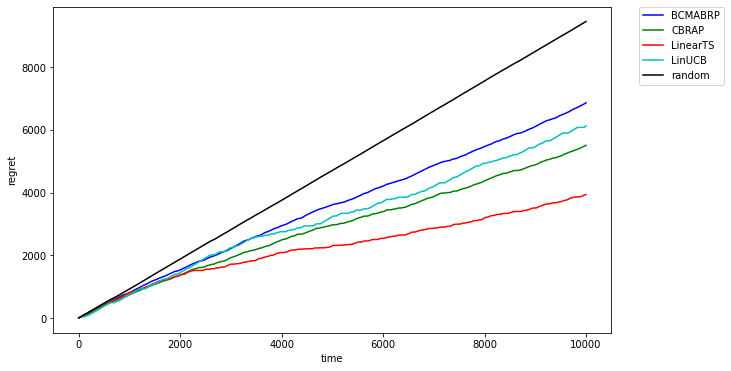

In [ ]:
experiment_bandit = ['D-LinTS-RP', 'CBRAP', 'LinearTS', 'LinUCB', 'random']
col = ['b', 'g', 'r', 'c', 'k', 'm', 'y']
times = 10000
i = 0
fig = plt.figure(figsize=[10, 6])
for bandit in experiment_bandit:
    # trend = regret_calculation(regret_all_D-LinTS-RP[0]) #np.mean(cum_results[bandit][1], axis=0)
    trend = np.mean(cum_results[bandit], axis =0) #cum_results[bandit][0]
    plt.plot(range(times), trend, c=col[i], ls='-', label=bandit)
    plt.xlabel('time')
    plt.ylabel('regret')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes = plt.gca()
    # axes.set_ylim([0, 1])
    #plt.title("Regret Bound with respect to T")
    i += 1
plt.show()

In [ ]:
fig.savefig("drive/MyDrive/P2/Results/Plot.png", format = 'png', dpi = 300)

In [ ]:
#Jester Results
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['10%', '25%', '50%']
rew_D-LinTS-RP = [, , ]
rew_CBRAP = [, , ]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(5,4))
rects1 = ax.bar(x - width/2, rew_D-LinTS-RP, width, color = 'red', label='D-LinTS-RP')
rects2 = ax.bar(x + width/2, rew_CBRAP, width, color = 'mediumblue', label='CBRAP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Cumulative Reward', fontsize=15)
ax.set_xlabel('Dimension Reduction', fontsize=15)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
plt.yticks(fontsize=15)
ax.legend(fontsize=15, ncol=2)

plt.ylim(0,6200)

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
fig.savefig("drive/MyDrive/P2/Results/Jester/Jester_plot.png", format = 'png', dpi = 300)

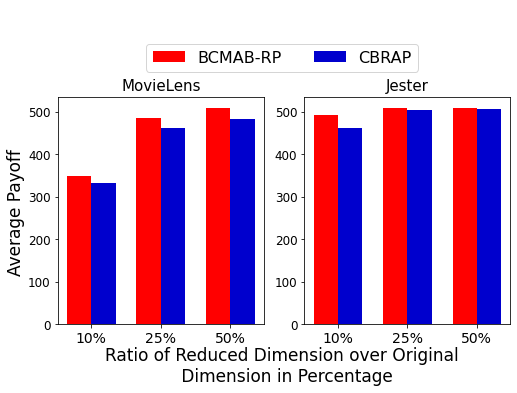

In [ ]:
#Reward _ Real
import matplotlib.pyplot as plt
import numpy as np

labels = ['10%', '25%', '50%']
rew_MovieLens_D-LinTS-RP = [3498.2/10, 4844.0/10, 5102.2/10] 
rew_MovieLens_CBRAP = [3325.0/10, 4624.0/10, 4842.0/10] #/ 10

rew_Jester_D-LinTS-RP = [4910.8/10, 5081.6/10, 5097.6/10] #/ 10
rew_Jester_CBRAP = [4623.0/10, 5042.0/10, 5071.0/10] #/ 10

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(7,4)) #, figsize=(7,3), sharey=True

rects1_MovieLens = ax1.bar(x - width/2, rew_MovieLens_D-LinTS-RP, width, color = 'red', label='D-LinTS-RP')
rects2_MovieLens = ax1.bar(x + width/2, rew_MovieLens_CBRAP, width, color = 'mediumblue', label='CBRAP')

rects1_Jester = ax2.bar(x - width/2, rew_Jester_D-LinTS-RP, width, color = 'red', label='D-LinTS-RP')
rects2_Jester = ax2.bar(x + width/2, rew_Jester_CBRAP, width, color = 'mediumblue', label='CBRAP')

# ax1.set_ylabel('Average Cumulative Reward', fontsize=15)
# ax1.set_xlabel('ratio of reduced dimension over original dimension', fontsize=15)
# ax2.set_xlabel('Dimension Reduction', fontsize=15)

fig.text(0.53, -0.09, 'Ratio of Reduced Dimension over Original \n Dimension in Percentage', ha='center', fontsize=17)
fig.text(-0.02, 0.5, 'Average Payoff', va='center', rotation='vertical', fontsize=17)

ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=14)
# ax1.legend(ncol=2, bbox_to_anchor=(1.3, 1.2))
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, 'upper center', bbox_to_anchor=(0.56, 1.24), ncol = 2, fontsize=16)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)

ax1.set_title('MovieLens', fontsize=15)
ax2.set_title('Jester', fontsize=15)

# plt.ylim(0,4400)

fig.tight_layout()

plt.show()

In [ ]:
fig.savefig("drive/MyDrive/P2/Results/rew_real_plot_Final_Recent.png", format = 'png', bbox_inches='tight', dpi = 300)

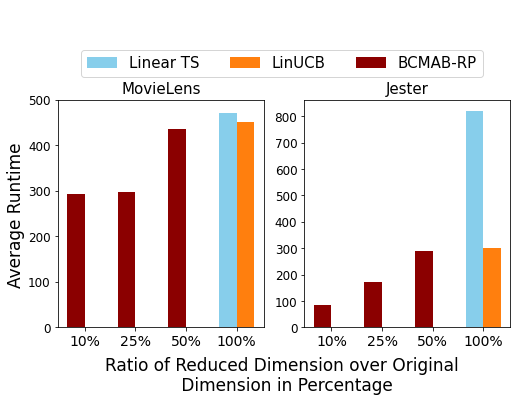

In [ ]:
#Time _ real
import matplotlib.pyplot as plt
import numpy as np

labels = ['10%', '25%', '50%', '100%']

time_MovieLens_LinearTS = [472.0]
time_MovieLens_LinUCB = [451.7]

time_Jester_LinearTS = [821.2]
time_Jester_LinUCB = [299.0]

time_MovieLens_D-LinTS-RP = [292.5, 298.4, 435.6]
time_MovieLens_CBRAP = [423.3, 430.6, 442.1]

time_Jester_D-LinTS-RP = [84.1, 171.1, 289.6]
time_Jester_CBRAP = [99.2, 121.8, 140.1]

x = np.arange(len(labels)) #-1  # the label locations
width = 0.35  # the width of the bars

y = x[-1] #+ 1

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(7,4)) #, sharey=True

rects1_MovieLens_LinearTS = ax1.bar(y - width/2, time_MovieLens_LinearTS, width, color = 'skyblue', label='Linear TS')
rects2_MovieLens_LinUCB = ax1.bar(y + width/2, time_MovieLens_LinUCB, width, color = 'tab:orange', label='LinUCB')

rects1_MovieLens = ax1.bar(x[0:-1] - width/2, time_MovieLens_D-LinTS-RP, width, color = 'darkred', label='D-LinTS-RP')
# rects2_MovieLens = ax1.bar(x[0:-1] + width/2, time_MovieLens_CBRAP, width, color = 'mediumblue', label='CBRAP')

rects1_Jester_LinearTS = ax2.bar(y - width/2, time_Jester_LinearTS, width, color = 'skyblue', label='Linear TS')
rects2_Jester_LinUCB = ax2.bar(y + width/2, time_Jester_LinUCB, width, color = 'tab:orange', label='LinUCB')

rects1_Jester = ax2.bar(x[0:-1] - width/2, time_Jester_D-LinTS-RP, width, color = 'darkred', label='D-LinTS-RP')
# rects2_Jester = ax2.bar(x[0:-1] + width/2, time_Jester_CBRAP, width, color = 'mediumblue', label='CBRAP')

# ax1.set_ylabel('Average Cumulative Reward', fontsize=15)
# ax1.set_xlabel('ratio of reduced dimension over original dimension', fontsize=15)
# ax2.set_xlabel('Dimension Reduction', fontsize=15)

fig.text(0.53, -0.11, 'Ratio of Reduced Dimension over Original \n Dimension in Percentage', ha='center', fontsize=17)
fig.text(-0.02, 0.5, 'Average Runtime', va='center', rotation='vertical', fontsize=17)

ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=14)
# ax1.legend(ncol=2, bbox_to_anchor=(1.3, 1.2))
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, 'upper center', bbox_to_anchor=(0.56, 1.25), ncol = 3, fontsize=15)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)

ax1.set_title('MovieLens', fontsize=15)
ax2.set_title('Jester', fontsize=15)

# plt.ylim(0,4400)

ax1.set_yticks(ax1.get_yticks()[::1][:6])

fig.tight_layout()

plt.show()



In [ ]:
fig.savefig("drive/MyDrive/P2/Results/time_real_plot_Final_1_Recent.png", format = 'png', bbox_inches='tight', dpi = 300)